# Задание №1. EDA данных cancer.csv

Проведите простейший анализ данных предложенного датасета:
1. Выведите количество строк с пропущенными значениями. Удалите их.
2. Выведите количество дублированных строк. Оставьте только оригинальные строки.
3. В одной из строк допущена ошибка в одном из признаков. Найдите эту строку, предположите, какая ошибка была допущена, и исправьте.
4. Найдите признак(и) с наибольшим разбросом.

Данные представляют собой измерения раковых и здоровых клеток. Целевая переменная - label.

In [237]:
import pandas as pd
import seaborn as sns
import numpy as np

# Путь к файлу cancer_eda.csv
CANCER_DATASET_PATH = "cancer_eda.csv"

In [238]:
df = pd.read_csv(CANCER_DATASET_PATH)
df


,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
569,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
570,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
571,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [239]:
df.info

<bound method DataFrame.info of     label      1      2       3       4        5        6        7        8  \
0       M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710   
1       M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
2       M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
3       M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
4       M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
..    ...    ...    ...     ...     ...      ...      ...      ...      ...   
568     B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   
569     M  17.14  16.40  116.00   912.7  0.11860  0.22760  0.22290  0.14010   
570     M  17.14  16.40  116.00   912.7  0.11860  0.22760  0.22290  0.14010   
571     M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
572     M  14.99  25.20   95.54   698.8  0.09387  0.05131  0.02398  0.02899   

          9  ...   

In [240]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,...,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,14.143628,19.305218,92.087644,656.220244,0.096413,0.104675,0.089161,0.049210,0.181509,0.062813,...,16.292564,25.676195,107.432234,882.716579,0.132346,0.368357,0.272269,0.114994,0.290130,0.083962
std,3.517888,4.312152,24.265308,351.117794,0.014085,0.053175,0.079881,0.039049,0.028299,0.007080,...,4.830848,6.140138,33.604025,568.537768,0.022860,2.746862,0.208279,0.066132,0.062351,0.018087
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.180000,75.210000,420.300000,0.086370,0.064920,0.029560,0.020360,0.161900,0.057690,...,13.030000,21.100000,84.160000,515.800000,0.116600,0.147200,0.114500,0.064930,0.250200,0.071460
50%,13.400000,18.840000,86.490000,552.400000,0.095870,0.093620,0.061550,0.033700,0.179200,0.061540,...,14.980000,25.400000,97.670000,687.600000,0.131300,0.214100,0.228200,0.100100,0.282200,0.080040
75%,16.020000,21.810000,104.700000,793.200000,0.105400,0.130500,0.131900,0.074040,0.195700,0.066150,...,18.980000,29.720000,126.300000,1095.000000,0.146100,0.339900,0.385300,0.162500,0.318400,0.092090
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,65.900000,1.252000,0.291000,0.663800,0.207500


In [241]:
bad_lines = []
for i in range(len(df)):
    a = df.loc[i].tolist()
    if 0.0 in a:
        bad_lines.append(i)
bad_lines

[101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568]

In [242]:
print(len(bad_lines))

13


In [243]:
df = df.drop(bad_lines, axis = 0, inplace = False)
df

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.74,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
569,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
570,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
571,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [244]:
df.drop_duplicates()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [245]:
import matplotlib.pyplot  as plt

**Ошибка** в 26-ом столбце признаков

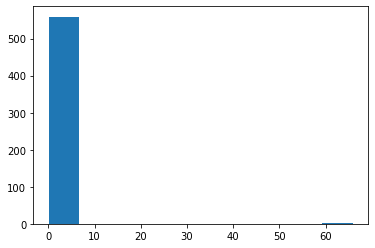

In [246]:
par = '26'
a = df[par]
fig, ax = plt.subplots()
ax = plt.hist(a)

In [247]:
ranges = [0, 10, 20, 25, 70]
df[par].groupby(pd.cut(df[par], ranges)).count()

26
(0, 10]     559
(10, 20]      0
(20, 25]      0
(25, 70]      1
Name: 26, dtype: int64

In [254]:
df26 = df['26']
for i in range(len(df26)):
    if i in bad_lines:
        continue
    if df26[i] > 40:
        print('raw ', i)
        print('\n', df.loc[i], sep='')

raw  33

label           M
1           19.27
2           26.47
3           127.9
4            1162
5         0.09401
6          0.1719
7          0.1657
8         0.07593
9          0.1853
10        0.06261
11         0.5558
12         0.6062
13          3.528
14          68.17
15       0.005015
16        0.03318
17        0.03497
18       0.009643
19        0.01543
20       0.003896
21          24.15
22           30.9
23          161.4
24           1813
25         0.1509
26           65.9
27         0.6091
28         0.1785
29         0.3672
30         0.1123
Name: 33, dtype: object


Изначально 65.9

Не поделили на 100

In [255]:
df.at[33, "26"] = df["26"][33] / 100

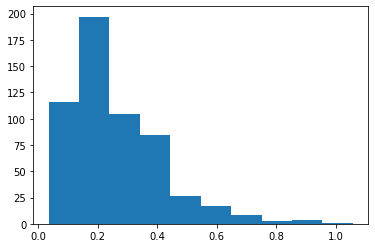

In [256]:
a = df[par]
fig, ax = plt.subplots()
ax = plt.hist(a)

**Исправлено**

In [257]:
desribe = df.describe()
desribe = desribe.drop(['count', 'mean', 'std', '25%', '50%', '75%'], axis = 0, inplace = False)
desribe

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
min,7.691,9.71,48.34,170.4,0.06251,0.01938,0.000692,0.001852,0.1167,0.04996,...,8.678,12.02,54.49,223.6,0.08125,0.03432,0.001845,0.008772,0.1565,0.05504
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.426800,0.201200,0.3040,0.09744,...,36.040,49.54,251.20,4254.0,0.22260,1.05800,1.252000,0.291000,0.6638,0.20750


In [258]:
k = range(1, 31)
for i in k:
    print(i, desribe[str(i)][1]-desribe[str(i)][0])

1 20.419
2 29.57
3 140.16
4 2330.6
5 0.10089
6 0.32602
7 0.426108
8 0.199348
9 0.1873
10 0.04748
11 2.7615000000000003
12 3.2078
13 21.223
14 535.398
15 0.028463000000000002
16 0.133148
17 0.395308
18 0.050938
19 0.071068
20 0.028945199999999997
21 27.362000000000002
22 37.519999999999996
23 196.70999999999998
24 4030.4
25 0.14134999999999998
26 1.0236800000000001
27 1.250155
28 0.28222800000000003
29 0.5073
30 0.15245999999999998


24 признак с наибольшим разбросом